In [75]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import numpy as np

In [77]:
url = 'https://aziza.tn/fr/home'

In [79]:
data = requests.get(url).content

In [80]:
soup = BeautifulSoup(data, "html.parser") 
soup

<!DOCTYPE html>

<html lang="fr">
<head>
<meta charset="utf-8"/>
<meta content="مغازات عزيزة - Magasins Aziza" name="title"/>
<meta content="INDEX,FOLLOW" name="robots"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>مغازات عزيزة - Magasins Aziza</title>
<link href="https://aziza.tn/static/version1707842367/_cache/merged/9fcd907111566c85d42b3ea8b244423d.min.css" media="all" rel="stylesheet" type="text/css"/>
<link href="https://aziza.tn/static/version1707842367/frontend/Sm/market_magasin/fr_FR/css/styles-l.min.css" media="screen and (min-width: 768px)" rel="stylesheet" type="text/css"/>
<link href="https://aziza.tn/static/version1707842367/frontend/Sm/market_magasin/fr_FR/css/print.min.css" media="print" rel="stylesheet" type="text/css"/>
<link href="https://aziza.tn/media/favicon/stores/1/favicon.png" rel="icon" type="image/x-icon"/>
<link href="

In [81]:
products = soup.find_all("div", class_="product-item-info")
products

[<div class="product-item-info 2025-04-02 00:00:00" id="catalogues-derniere-img-f">
                           Semaine dernière 
                         </div>,
 <div class="product-item-info 2025-04-09 00:00:00" id="catalogues-en-cours-img-f">
 
                         
                         Promos de la semaine 
 
                         </div>,
 <div class="product-item-info 2025-04-02 00:00:00" id="catalogues-derniere-img">
 <span class="product-image-container">
 <span class="product-image-wrapper">
 <img alt="Promo de la semaine" class="product-image-photo" height="" src="https://aziza.tn/media/catalog/product/cache/1267a79388e844632696facf1a71b0a2/1/_/1_1ff6_75ee.jpg" width="">
 </img></span>
 </span>
 </div>,
 <div class="product-item-info 2025-04-09 00:00:00" id="catalogues-en-cours-img">
 <span class="product-image-container">
 <span class="product-image-wrapper">
 <img alt="Mercredi prochain" class="product-image-photo" height="" src="https://aziza.tn/media/catalog/pro

In [85]:
# Initialize lists to store product details
product_names = []
categories = []
prices = []
promotional_details = []
availability_statuses = []

# Loop through each product item
for product in products:
    # Extract product name
    name_tag = product.find('a', class_='product-item-link')
    product_name = name_tag.text.strip() if name_tag else 'N/A'
    product_names.append(product_name)
    
    # Extract category (assuming it's in the 'brand' span)
    category_tag = product.find('span', class_='brand')
    category = category_tag.text.strip() if category_tag else 'N/A'
    categories.append(category)
    
    # Extract price
    price_tag = product.find('span', class_='price')
    price = price_tag.text.strip() if price_tag else 'N/A'
    prices.append(price)
    
    # Extract promotional details (assuming it's in the 'super' div)
    promo_tag = product.find('div', class_='super')
    promo = promo_tag.text.strip() if promo_tag else 'N/A'
    promotional_details.append(promo)
    
    # Extract availability status (assuming it's in the 'tocart' button)
    availability_tag = product.find('button', class_='tocart')
    availability = availability_tag.text.strip() if availability_tag else 'N/A'
    availability_statuses.append(availability)

In [87]:
# Create a DataFrame

data = {
    'Product Name': product_names,
    'Category': categories,
    'Price': prices,
    'Promotional Details': promotional_details,
    'Availability Status': availability_statuses
}

df = pd.DataFrame(data)

# Display the DataFrame
df

,Product Name,Category,Price,Promotional Details,Availability Status
0,N/A,N/A,N/A,N/A,N/A
1,N/A,N/A,N/A,N/A,N/A
2,N/A,N/A,N/A,N/A,N/A
3,N/A,N/A,N/A,N/A,N/A
4,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...
300,Set de 4 ustensiles de cuisson en silicone,,"23,980",N/A,Ajouter au panier
301,Poêle à crêpe,,"27,980",N/A,Ajouter au panier
302,Casserole à lait,,"28,980",N/A,Ajouter au panier
303,Poêle,,"30,980",N/A,Ajouter au panier


In [ ]:
#Address missing or inconsistent data entries, such as absent prices or ambiguous product descriptions.
#Standardize text fields to ensure uniformity in product names and categories.

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Name         305 non-null    object
 1   Category             305 non-null    object
 2   Price                305 non-null    object
 3   Promotional Details  305 non-null    object
 4   Availability Status  305 non-null    object
dtypes: object(5)
memory usage: 12.0+ KB


In [91]:
df.isnull().sum()

Product Name           0
Category               0
Price                  0
Promotional Details    0
Availability Status    0
dtype: int64

In [93]:
df  = df.replace("N/A", np.nan).dropna(how = "all")

In [95]:
df = df.replace(" ", np.nan)

In [97]:
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

/var/folders/8k/nys88b0n7hj86fq0y90vt9fc0000gn/T/ipykernel_62744/2678488232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(r"^\s*$", np.nan, regex=True, inplace=True)


In [99]:
df

,Product Name,Category,Price,Promotional Details,Availability Status
5,Huile de colza,El Behi,"21,900",NaN,Voir disponibilité
6,Pot de conservation en plastique,NaN,"0,900",NaN,Voir disponibilité
7,Pot de conservation en plastique,NaN,"1,100",NaN,Voir disponibilité
8,Bouteille avec couvercle,NaN,"1,100",NaN,Voir disponibilité
9,Organisateur tiroir,NaN,"1,590",NaN,Voir disponibilité
...,...,...,...,...,...
300,Set de 4 ustensiles de cuisson en silicone,NaN,"23,980",NaN,Ajouter au panier
301,Poêle à crêpe,NaN,"27,980",NaN,Ajouter au panier
302,Casserole à lait,NaN,"28,980",NaN,Ajouter au panier
303,Poêle,NaN,"30,980",NaN,Ajouter au panier


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 5 to 304
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product Name         300 non-null    object 
 1   Category             175 non-null    object 
 2   Price                300 non-null    object 
 3   Promotional Details  0 non-null      float64
 4   Availability Status  123 non-null    object 
dtypes: float64(1), object(4)
memory usage: 14.1+ KB


In [103]:
#Trying to reset index back to 0
df = df.reset_index(drop=True)

In [105]:
#changing the nan in my category to unknown 

df["Category"] = df["Category"].fillna("Unknown")

In [107]:
print(df['Product Name'].value_counts())

Product Name
Boite de conservation                 15
Mug en céramique                       7
Boite de conservation en plastique     6
Pot en verre                           6
Bouteille  avec couvercle              4
                                      ..
Maïs                                   1
Fromage blanc carré                    1
Tomate double concentre                1
Chamia nature                          1
Tasse à café                           1
Name: count, Length: 224, dtype: int64


In [109]:
print(df['Category'].value_counts())

Category
Unknown                125
Cœur d'or               40
El Behi                 32
Omnia                   18
IVI                     10
Axe                      8
Lilas                    7
FANNENA                  7
Zahi                     5
Nassiha                  5
Mozaic                   4
Freshky                  4
Délice                   4
Saida                    3
Velour                   3
Henia                    2
Colgate                  2
Sonoro                   2
Signal                   2
Palmolive                2
Tropico                  2
Melina                   1
Président                1
Eskimo                   1
Brava                    1
C'fresh                  1
Oh                       1
OH !                     1
Moulin d'Or              1
Daily                    1
Rojanet                  1
Papillon                 1
PRODUITS DU CAP BON      1
Daily'n                  1
Name: count, dtype: int64


In [111]:
#Clean and convert price column

df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [113]:
print(df['Product Name'].unique())

['Huile de colza' 'Pot de conservation en plastique'
 'Pot de conservation  en plastique' 'Bouteille  avec couvercle'
 'Organisateur tiroir' 'Pot extra de  conservation'
 'Jarre en verre avec couvercle' 'Tasse imprimé' 'Boite de conservation'
 'Pot en verre' 'Riz basmati' 'Goblet multi couleurs avec paille'
 'Boite de conservation en plastique' 'Coffret 6 bols carrée'
 '6 bols rectangulaires' 'Carafe à eau'
 'Plateau  rectangulaire motif fraise' 'Mug en céramique'
 'Mug en céramique motif fraise' 'Mug en céramique motif pastèque'
 'Mug en céramique motif citron f' 'Rape à fromage' 'Set 6 verres à eau'
 'Coffret 6 assiettes à déssert'
 'Poubelle en plastic  avec couvercle motif fraise'
 'Set de 4 ustensiles de cuisson en silicone' 'Poêle à crêpe'
 'Casserole à lait' 'Poêle' 'Chocolat instantané' 'Crème dessert praliné'
 'Crème dessert vanille' 'Crème dessert danette zgougou'
 'Cocktail de fruits multivitaminé' 'Lot de 6 gaufrette enrobé'
 'Poudre à crème vanille' 'Lot 4 gaufrettes enrob

In [115]:
# Categorizing products into hierarchical groups

def categorize_hierarchy(name):
    name = name.lower()

    # Electronics
    if any(word in name for word in ['tv', 'casque', 'grille pain', 'blender', 'fer à repasser', 'lampe', 'gaufrier']):
        return 'Electronics > Appliances'
    elif any(word in name for word in ['voiture', 'poupée', 'jouet', 'dinosaure']):
        return 'Toys & Games > Vehicles or Dolls'

    # Food
    elif any(word in name for word in ['yaourt', 'fromage', 'cake', 'gaufrette', 'muffin', 'tarte', 'pain', 'crème', 'biscuit']):
        return 'Food > Dairy & Bakery'
    elif any(word in name for word in ['boisson', 'jus', 'eau', 'nectar', 'café']):
        return 'Food > Beverages'
    elif any(word in name for word in ['sauce', 'harissa', 'huile', 'thon', 'salami', 'jambon', 'riz']):
        return 'Food > Condiments & Staples'

    # Household Items
    elif any(word in name for word in ['liquide vaisselle', 'eau de javel', 'lessive', 'nettoyant']):
        return 'Household > Cleaning Supplies'
    elif any(word in name for word in ['verre', 'tasse', 'mug', 'assiette', 'boite', 'bouteille', 'pot', 'plateau']):
        return 'Household > Kitchenware'
    elif any(word in name for word in ['presse-agrumes', 'faitout', 'moule', 'sauteuse', 'plat']):
        return 'Household > Cookware'

    # Personal Care
    elif any(word in name for word in ['shampooing', 'déodorant', 'dentifrice', 'cotton-tige']):
        return 'Personal Care > Hygiene'

    # Textiles & Accessories
    elif any(word in name for word in ['chaussette', 'serviette']):
        return 'Textiles > Apparel & Linens'

    # Seasonal/Other
    elif 'encensoir' in name:
        return 'Seasonal > Religious Items'
    elif 'hlou' in name or 'gateau' in name:
        return 'Food > Sweets & Desserts'

    else:
        return 'General > Other'

In [127]:
# Applying hierarchical grouping to the DataFrame
df['Hierarchy'] = df['Product Name'].apply(categorize_hierarchy)

df.tail(20)

,Product Name,Category,Price,Promotional Details,Availability Status,Hierarchy
280,Plateau rectangulaire motif fraise,Unknown,7980.0,NaN,Ajouter au panier,Food > Beverages
281,Boite de conservation en plastique,Unknown,8800.0,NaN,Ajouter au panier,Household > Kitchenware
282,Boite de conservation,Unknown,8980.0,NaN,Ajouter au panier,Household > Kitchenware
283,Mug en céramique,Unknown,9500.0,NaN,Ajouter au panier,Household > Kitchenware
284,Mug en céramique,Unknown,9500.0,NaN,Ajouter au panier,Household > Kitchenware
285,Mug en céramique,Unknown,9500.0,NaN,Ajouter au panier,Household > Kitchenware
286,Mug en céramique motif fraise,Unknown,10450.0,NaN,Ajouter au panier,Household > Kitchenware
287,Mug en céramique motif pastèque,Unknown,10450.0,NaN,Ajouter au panier,Household > Kitchenware
288,Mug en céramique motif citron f,Unknown,10450.0,NaN,Ajouter au panier,Household > Kitchenware
289,Rape à fromage,Unknown,10550.0,NaN,Ajouter au panier,Food > Dairy & Bakery


In [ ]:
#Data Analysis:#Conduct exploratory data analysis (EDA) to uncover insights:
#Identify average pricing within each product category.
#Detect seasonal or promotional pricing patterns.- i dropped promotional column already
#Assess product availability trends over time.- no date in my table so i cant do this
 

In [129]:
avg_price_category = df.groupby('Category')['Price'].mean().reset_index()
avg_price_category.columns = ['Category', 'Average Price']
avg_price_category

,Category,Average Price
0,Axe,7490.000000
1,Brava,15990.000000
2,C'fresh,2990.000000
3,Colgate,3990.000000
4,Cœur d'or,4282.750000
5,Daily,2190.000000
6,Daily'n,5490.000000
7,Délice,2072.500000
8,El Behi,7996.250000
9,Eskimo,14990.000000


In [131]:
# Group by Category Hierarchy and calculate price variability
price_variability = df.groupby('Category')['Price'].agg(['mean', 'std']).reset_index()
price_variability.columns = ['Category', 'Average Price', 'Price Variability']

# Display results
price_variability


,Category,Average Price,Price Variability
0,Axe,7490.000000,0.000000
1,Brava,15990.000000,NaN
2,C'fresh,2990.000000,NaN
3,Colgate,3990.000000,0.000000
4,Cœur d'or,4282.750000,2673.245399
5,Daily,2190.000000,NaN
6,Daily'n,5490.000000,NaN
7,Délice,2072.500000,2612.181400
8,El Behi,7996.250000,6678.280999
9,Eskimo,14990.000000,NaN


In [ ]:
#Employ visualization library Plotly to create some charts.

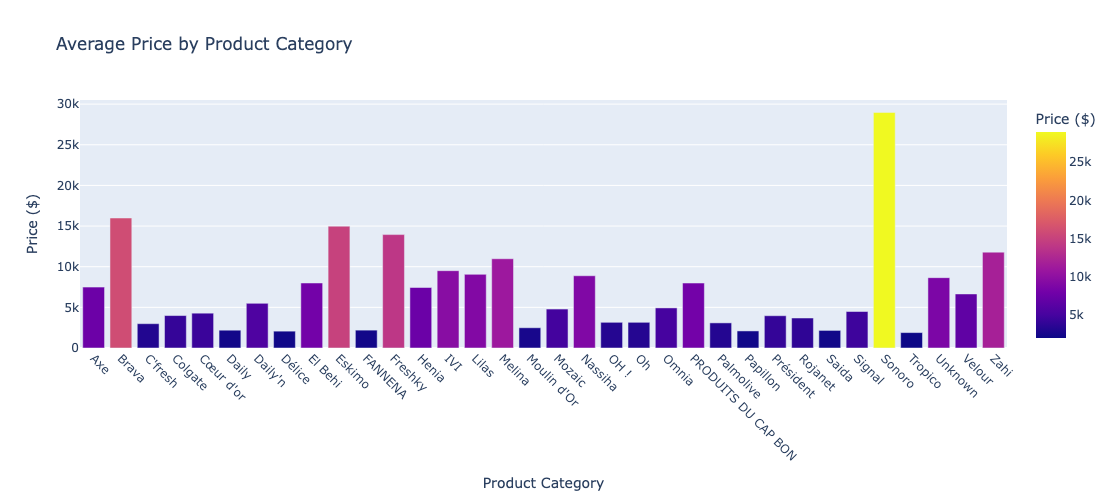

In [133]:
fig = px.bar(avg_price_category, 
             x='Category', 
             y='Average Price', 
             title='Average Price by Product Category', 
             labels={'Category': 'Product Category', 'Average Price': 'Price ($)'},
             color='Average Price',
             height=500)
fig.update_layout(xaxis_tickangle=45)
fig.show()

In [ ]:
#Each bar corresponds to a category and its height indicates the average price of products in that category.
#Taller bars represent categories with higher average prices, while shorter bars indicate lower average prices.
#Categories with higher average prices are shown in a darker shade, and lighter shades represent lower average prices.
#SwissCook has the highest average price 


In [137]:
df

,Product Name,Category,Price,Promotional Details,Availability Status,Hierarchy
0,Huile de colza,El Behi,21900.0,NaN,Voir disponibilité,Food > Condiments & Staples
1,Pot de conservation en plastique,Unknown,900.0,NaN,Voir disponibilité,Household > Kitchenware
2,Pot de conservation en plastique,Unknown,1100.0,NaN,Voir disponibilité,Household > Kitchenware
3,Bouteille avec couvercle,Unknown,1100.0,NaN,Voir disponibilité,Household > Kitchenware
4,Organisateur tiroir,Unknown,1590.0,NaN,Voir disponibilité,General > Other
...,...,...,...,...,...,...
295,Set de 4 ustensiles de cuisson en silicone,Unknown,23980.0,NaN,Ajouter au panier,General > Other
296,Poêle à crêpe,Unknown,27980.0,NaN,Ajouter au panier,General > Other
297,Casserole à lait,Unknown,28980.0,NaN,Ajouter au panier,General > Other
298,Poêle,Unknown,30980.0,NaN,Ajouter au panier,General > Other


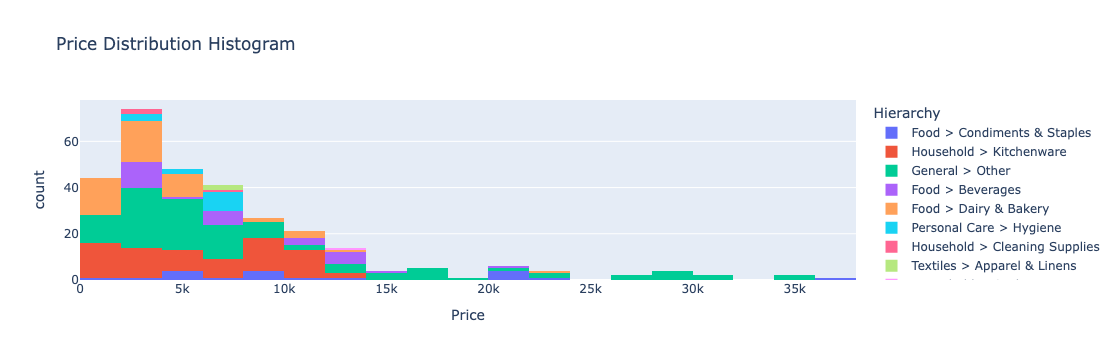

In [139]:
fig = px.histogram(df, 
                   x='Price', 
                   color='Hierarchy', 
                   title='Price Distribution Histogram')
fig.show()
